In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from IPython.display import clear_output

In [2]:
df = pd.read_csv('data.csv')

/tmp/ipykernel_16144/1507164070.py:1: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data.csv')


In [3]:
df

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,261962,https://sofifa.com/player/261962/defu-song/220002,Song Defu,宋德福,CDM,47,52,70000.0,1000.0,22,...,46+2,46+2,46+2,48+2,15+2,https://cdn.sofifa.net/players/261/962/22_120.png,https://cdn.sofifa.net/teams/112541/60.png,https://cdn.sofifa.net/flags/cn.png,NaN,https://cdn.sofifa.net/flags/cn.png
19235,262040,https://sofifa.com/player/262040/caoimhin-port...,C. Porter,Caoimhin Porter,CM,47,59,110000.0,500.0,19,...,44+2,44+2,44+2,48+2,14+2,https://cdn.sofifa.net/players/262/040/22_120.png,https://cdn.sofifa.net/teams/445/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19236,262760,https://sofifa.com/player/262760/nathan-logue/...,N. Logue,Nathan Logue-Cunningham,CM,47,55,100000.0,500.0,21,...,45+2,45+2,45+2,47+2,12+2,https://cdn.sofifa.net/players/262/760/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19237,262820,https://sofifa.com/player/262820/luke-rudden/2...,L. Rudden,Luke Rudden,ST,47,60,110000.0,500.0,19,...,26+2,26+2,26+2,32+2,15+2,https://cdn.sofifa.net/players/262/820/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png


In [5]:
features = ['overall','potential','wage_eur','value_eur','age']

In [6]:
df.dropna(subset=features,inplace=True)

In [7]:
df_features = df[features].copy()

In [9]:
df_features

,overall,potential,wage_eur,value_eur,age
0,93,93,320000.0,78000000.0,34
1,92,92,270000.0,119500000.0,32
2,91,91,270000.0,45000000.0,36
3,91,91,270000.0,129000000.0,29
4,91,91,350000.0,125500000.0,30
...,...,...,...,...,...
19234,47,52,1000.0,70000.0,22
19235,47,59,500.0,110000.0,19
19236,47,55,500.0,100000.0,21
19237,47,60,500.0,110000.0,19


In [12]:
df_scaled = ((df_features - df_features.min()) / (df_features.max() - df_features.min())) * 10 + 1

In [13]:
df_scaled.describe()

,overall,potential,wage_eur,value_eur,age
count,19165.000000,19165.000000,19165.000000,19165.000000,19165.000000
mean,4.670472,5.319998,1.219443,1.131826,4.063345
std,1.346635,1.191076,0.501528,0.353229,1.575838
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.739130,4.521739,1.012876,1.021620,2.666667
50%,4.717391,5.304348,1.064378,1.044817,4.000000
75%,5.500000,6.086957,1.193133,1.092370,5.333333
max,10.000000,10.000000,10.000000,10.000000,10.000000


In [14]:
df_scaled.head()

,overall,potential,wage_eur,value_eur,age
0,10.000000,9.608696,9.227468,4.618307,7.000000
1,9.804348,9.413043,7.939914,6.543654,6.333333
2,9.608696,9.217391,7.939914,3.087308,7.666667
3,9.608696,9.217391,7.939914,6.984396,5.333333
4,9.608696,9.217391,10.000000,6.822018,5.666667


In [17]:
def random_centroids(data,k):
  centroids = []
  for i in range(k):
    centroid = data.apply(lambda x: float(x.sample()))
    centroids.append(centroid)
  return pd.concat(centroids,axis=1)

In [18]:
centroids = random_centroids(df_scaled,5)

/tmp/ipykernel_16144/4119496885.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centroid = data.apply(lambda x: float(x.sample()))


In [19]:
centroids

,0,1,2,3,4
overall,5.695652,5.304348,6.086957,5.108696,5.695652
potential,6.282609,5.108696,4.913043,6.086957,4.913043
wage_eur,1.064378,1.010300,1.090129,1.007725,2.583691
value_eur,1.045976,1.044817,1.010253,1.129485,1.022779
age,3.000000,2.000000,4.000000,4.000000,2.000000


In [23]:
def get_labels(data,centroids):
  distances = centroids.apply(lambda x: np.sqrt(((data - x)**2).sum(axis=1)))
  return distances.idxmin(axis=1)

In [24]:
labels = get_labels(df_scaled,centroids)

In [25]:
labels

0        4
1        4
2        3
3        4
4        4
        ..
19234    1
19235    1
19236    1
19237    1
19238    1
Length: 19165, dtype: int64

In [26]:
labels.value_counts()

2    7414
1    4646
3    3939
0    3134
4      32
Name: count, dtype: int64

In [37]:
def new_centroids(data,labels,k):
  centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
  return centroids

In [38]:
def plot_clusters(data,labels,centroids,iteration):
  pca = PCA(n_components=2)
  data_2d = pca.fit_transform(data)
  centroids_2d = pca.fit_transform(centroids.T)
  clear_output(wait=True)
  plt.title(f'Iteration {iteration}')
  plt.scatter(x=data_2d[:,0],y=data_2d[:,1],c=labels)
  plt.scatter(x=centroids_2d[:,0],y=centroids_2d[:,1])
  plt.show()

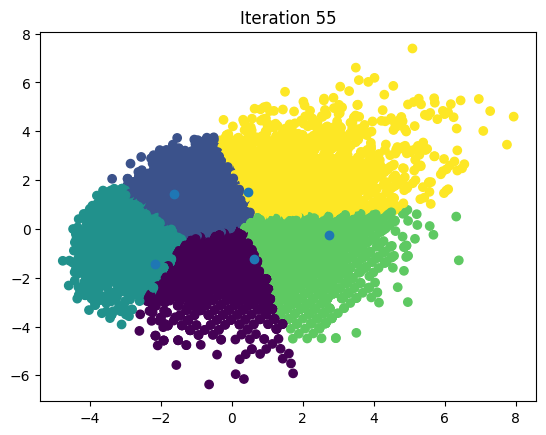

In [43]:
max_iterations = 200
k = 5
centroids = random_centroids(df_scaled,k)
old_centroids = pd.DataFrame()
iteration = 1
while iteration < max_iterations and not centroids.equals(old_centroids):
  old_centroids = centroids
  labels = get_labels(df_scaled,centroids)
  centroids = new_centroids(df_scaled,labels,k)
  plot_clusters(df_scaled,labels,centroids,iteration)
  iteration += 1

In [44]:
centroids

,0,1,2,3,4
overall,4.075327,4.324975,2.521264,5.466359,6.516337
potential,3.989831,5.872427,4.430371,5.121871,6.892355
wage_eur,1.046160,1.073663,1.016237,1.208723,1.715538
value_eur,1.026643,1.062533,1.013545,1.073443,1.487391
age,4.713610,2.688942,2.309197,5.884316,3.931080


In [47]:
df[labels == 3][["short_name"] + features]

,short_name,overall,potential,wage_eur,value_eur,age
97,Z. Ibrahimović,84,84,51000.0,14500000.0,39
199,Pepe,82,82,14000.0,5500000.0,38
200,Raúl Albiol,82,82,30000.0,8000000.0,35
201,Ł. Fabiański,82,82,43000.0,3400000.0,36
284,Joaquín,81,81,23000.0,8500000.0,39
...,...,...,...,...,...,...
13988,J. Machado,62,62,500.0,70000.0,39
14394,J. Murphy,61,61,850.0,35000.0,39
14396,B. Murphy,61,61,500.0,35000.0,38
14406,C. Gauseth,61,61,650.0,100000.0,37


In [51]:
df.groupby(labels)[features].describe().apply(round).T

0          1         2           3            4
overall   count     3932.0     5247.0    2656.0      4414.0       2916.0
          mean        63.0       64.0      55.0        70.0         75.0
          std          3.0        3.0       3.0         3.0          4.0
          min         49.0       54.0      47.0        60.0         69.0
          25%         61.0       62.0      53.0        68.0         72.0
          50%         63.0       64.0      55.0        70.0         75.0
          75%         65.0       67.0      58.0        72.0         78.0
          max         69.0       73.0      64.0        84.0         93.0
potential count     3932.0     5247.0    2656.0      4414.0       2916.0
          mean        65.0       74.0      67.0        70.0         79.0
          std          3.0        4.0       4.0         3.0          4.0
          min         49.0       65.0      51.0        60.0         71.0
          25%         63.0       71.0      65.0        68.0         76.0
          50%         65.0       74.0      67.0        70.0         79.0
          75%         67.0       76.0      70.0        73.0         82.0
          max         71.0       87.0      78.0        84.0         95.0
wage_eur  count     3932.0     5247.0    2656.0      4414.0       2916.0
          mean      2334.0     3500.0    1144.0      9422.0      34544.0
          std       1900.0     3640.0    1040.0      9795.0      38668.0
          min        500.0      500.0     500.0       500.0        500.0
          25%       1000.0     1000.0     500.0      3000.0      12000.0
          50%       2000.0     2000.0     800.0      6000.0      23000.0
          75%       3000.0     5000.0    1000.0     12000.0      43000.0
          max      18000.0    35000.0   10000.0    100000.0     350000.0
value_eur count     3932.0     5247.0    2656.0      4414.0       2916.0
          mean    585454.0  1368044.0  301291.0   1633609.0   12735871.0
          std     311767.0   722588.0  122686.0   1455344.0   16124999.0
          min       9000.0   350000.0   50000.0     35000.0    1500000.0
          25%     350000.0   800000.0  210000.0    750000.0    3700000.0
          50%     550000.0  1200000.0  300000.0   1300000.0    6500000.0
          75%     775000.0  1800000.0  400000.0   2000000.0   15000000.0
          max    1500000.0  4600000.0  700000.0  14500000.0  194000000.0
age       count     3932.0     5247.0    2656.0      4414.0       2916.0
          mean        27.0       21.0      20.0        31.0         25.0
          std          3.0        2.0       2.0         3.0          3.0
          min         23.0       16.0      16.0        25.0         17.0
          25%         25.0       20.0      19.0        29.0         23.0
          50%         27.0       21.0      20.0        31.0         25.0
          75%         29.0       23.0      22.0        33.0         27.0
          max         41.0       25.0      25.0        43.0         36.0